# 1. Introduction

## Predict the Introverts from the Extroverts Using TensorFlow

## Objective
The objective of this project is to build a machine learning model using the TensorFlow library to predict whether a person is an introvert or extrovert based on various social and behavioral characteristics. The dataset used for this project is provided by the Kaggle competition.

## Dataset Description
The dataset contains the following columns:

- **id**: Unique identifier for each entry.
- **Time_spent_Alone**: Time the person spends alone, in hours.
- **Stage_fear**: Indicates if the person has a fear of speaking in public (yes or no).
- **Social_event_attendance**: Number of social events attended by the person.
- **Going_outside**: Number of times the person goes outside.
- **Drained_after_socializing**: Indicates if the person feels drained after socializing (yes or no).
- **Friends_circle_size**: Size of the person's circle of friends.
- **Post_frequency**: Frequency of posts on social media.
- **Personality**: The target class, indicating if the person is "Introvert" or "Extrovert".

## Notebook Structure
The notebook will be structured as follows:

1. **Importing Libraries**: We will load necessary libraries such as TensorFlow and Matplotlib.
2. **Loading Data**: We will read the CSV dataset and display a sample.
3. **Data Preprocessing**: 
   - We will check for and handle missing data.
   - Convert categorical variables to numerical format.
   - Split the data into training and validation sets.
4. **Model Building**: We will use TensorFlow's Keras API to create and compile a neural network model.
5. **Model Training**: We will train the model using the training dataset and validate its performance.
6. **Model Evaluation**: We will assess the model's performance using appropriate metrics such as accuracy, recall, and F1-score.
7. **Predictions**: We will use the trained model to make predictions on new data.

## Conclusion
By the end of this notebook, we aim to have an effective model capable of accurately predicting personality traits based on the provided features. This project will allow us to explore the TensorFlow library and apply machine learning techniques to a real-world problem.

# 2. Imports

In [1]:
%%time
# Cell 1: Import Libraries
import os  # For operating system functionalities
import pandas as pd  # For data manipulation and analysis with DataFrames
import numpy as np  # For numerical operations on arrays and matrices
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.experimental import enable_iterative_imputer  # Needed to use IterativeImputer
from sklearn.impute import IterativeImputer  # For iterative imputation of missing values
from sklearn.preprocessing import MinMaxScaler, RobustScaler  # For scaling feature values
from sklearn.decomposition import TruncatedSVD  # For dimensionality reduction
from sklearn.utils import resample  # For resampling methods
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  # For data visualization
import tensorflow as tf  # For building and training the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

2025-07-08 14:42:23.196262: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751985743.491837      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751985743.577160      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


CPU times: user 13.1 s, sys: 2.66 s, total: 15.8 s
Wall time: 23.8 s


# 3. Tensor Flow Information

In [2]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.18.0
Eager execution: True


# 4. Data Preprocessing Functions - Version - 2.0

This notebook section contains a set of functions designed to preprocess a DataFrame for a specific analysis or machine learning task. The functions handle missing values in various columns by filling them with predefined values, means, or based on logical conditions.

## Functions

### 1. `fill_nan(df)`

Fills missing values in the DataFrame for specified columns. It sets default values for certain columns, ensuring that no `NaN` values remain.

**Parameters:**
- `df` (pd.DataFrame): The input DataFrame containing the relevant columns to fill.

**Returns:**
- pd.DataFrame: The DataFrame with specified missing values filled.

### 2. `fill_nans_with_means(df)`

Fills missing values in the DataFrame with predefined mean values for specific columns. This function prepares the data for further analysis by replacing `-1` placeholders with actual mean values.

**Parameters:**
- `df` (pd.DataFrame): The input DataFrame containing the relevant columns to fill.

**Returns:**
- pd.DataFrame: The DataFrame with specified columns filled with mean values.

### 3. `party(df)`

Processes the `Stage_fear` column by filling its missing values based on related social attributes. It uses logical conditions to determine if a value should be set to `0` (not fearful) or `1` (fearful).

**Parameters:**
- `df` (pd.DataFrame): The input DataFrame containing the relevant columns.

**Returns:**
- pd.DataFrame: The processed DataFrame with the `Stage_fear` values filled.

### 4. `the_hole(df)`

Adjusts the `Drained_after_socializing` column by filling in missing values based on social engagement metrics. Similar to `party`, it uses logical conditions based on the social context.

**Parameters:**
- `df` (pd.DataFrame): The input DataFrame containing the relevant columns.

**Returns:**
- pd.DataFrame: The processed DataFrame with the `Drained_after_socializing` values filled.

### 5. `preprocess(df)`

Main function that orchestrates the entire preprocessing workflow. It calls the `fill_nan`, `party`, and `the_hole` functions sequentially to ensure the DataFrame is fully prepared for analysis.

**Parameters:**
- `df` (pd.DataFrame): The input DataFrame to be preprocessed.

**Returns:**
- pd.DataFrame: The fully processed DataFrame with all missing values handled.

### 6. `validate_no_nans(df)`

Checks that there are no `NaN` values remaining in the DataFrame after preprocessing.

**Parameters:**
- `df` (pd.DataFrame): The DataFrame to validate.

**Returns:**
- None. Raises an assertion error if any `NaN` values are found.

In [3]:
# Define constants for means
MEAN_TIME_SPENT_ALONE = 5
MEAN_SOCIAL_ATTENDANCE = 5
MEAN_GOING_OUTSIDE = 4 # Was 3 
MEAN_FRIENDS_CIRCLE_SIZE = 8 # Was 7
MEAN_POST_FREQUENCY = 5

def fill_nan(df):
    """
    Fills missing values in the DataFrame for specified columns.
    """
    df['Time_spent_Alone'] = df['Time_spent_Alone'].fillna(-1)
    df['Stage_fear'] = df['Stage_fear'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    df['Social_event_attendance'] = df['Social_event_attendance'].fillna(-1)
    df['Going_outside'] = df['Going_outside'].fillna(-1)
    df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    df['Friends_circle_size'] = df['Friends_circle_size'].fillna(-1)
    df['Post_frequency'] = df['Post_frequency'].fillna(-1)
    return df

def fill_nans_with_means(df):
    """
    Preprocess the DataFrame to fill missing values with predefined means.
    """
    df['Time_spent_Alone'] = df['Time_spent_Alone'].replace(-1, MEAN_TIME_SPENT_ALONE)
    df['Social_event_attendance'] = df['Social_event_attendance'].replace(-1, MEAN_SOCIAL_ATTENDANCE)
    df['Going_outside'] = df['Going_outside'].replace(-1, MEAN_GOING_OUTSIDE)
    df['Friends_circle_size'] = df['Friends_circle_size'].replace(-1, MEAN_FRIENDS_CIRCLE_SIZE)
    df['Post_frequency'] = df['Post_frequency'].replace(-1, MEAN_POST_FREQUENCY)
    return df

def party(df):
    """
    Preprocess the DataFrame to fill missing values for 'Stage_fear'.
    """
    df = fill_nans_with_means(df)
    mask = df['Stage_fear'] == -1

    df.loc[mask & (df['Social_event_attendance'] >= MEAN_SOCIAL_ATTENDANCE) & (df['Going_outside'] >= MEAN_GOING_OUTSIDE), 'Stage_fear'] = 0
    df.loc[mask & (df['Social_event_attendance'] < MEAN_SOCIAL_ATTENDANCE) & (df['Going_outside'] < MEAN_GOING_OUTSIDE), 'Stage_fear'] = 1
    return df

def the_hole(df):
    """
    Preprocess the DataFrame to fill missing values for 'Drained_after_socializing'.
    """
    mask = df['Drained_after_socializing'] == -1

    df.loc[mask & (df['Social_event_attendance'] >= MEAN_SOCIAL_ATTENDANCE) & (df['Friends_circle_size'] >= MEAN_FRIENDS_CIRCLE_SIZE), 'Drained_after_socializing'] = 0
    df.loc[mask & (df['Social_event_attendance'] < MEAN_SOCIAL_ATTENDANCE) & (df['Friends_circle_size'] < MEAN_FRIENDS_CIRCLE_SIZE), 'Drained_after_socializing'] = 1
    return df

def preprocess(df):
    """
    Main function to preprocess the DataFrame by filling missing values.
    """
    df = df.copy()  # Avoid modifying the original DataFrame
    df = fill_nan(df)
    df = party(df)
    df = the_hole(df)
    return df

def validate_no_nans(df):
    """
    Validate that there are no NaNs in the DataFrame.
    """
    assert df.isnull().sum().sum() == 0, "There are still NaNs in the DataFrame!"

# 5. Load the Datasets

In this cell, the training and testing datasets are loaded into the environment using Pandas. The following actions are performed:

1. **Loading Data**: The training dataset (`train.csv`) and the testing dataset are read from the specified file paths using `pd.read_csv()`.

2. **Data Verification**: The first few rows of each dataset are displayed using `display()` to confirm that the data has been loaded correctly. This method provides a clearer and more visually understandable format, enhancing the inspection of the structure and contents of the data.

By loading the datasets, we can then proceed to preprocess the data for feature extraction and model training.

In [4]:
# Cell 5: Load the Datasets

# Load the dataset
train = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')

## 6. Preprocess Data

In this cell, we perform essential steps to load and preprocess the datasets for analysis.

### Steps:

1. **Load the Datasets**:
   - The training and test datasets are loaded from specified CSV files.

2. **Define the Target Variable**:
   - The target variable `y` is created from the `Personality` column in the training dataset, where "Introvert" is mapped to `0` and "Extrovert" is mapped to `1`. This will be used for model training.

3. **Prepare Feature Set**:
   - The `id` and `Personality` columns are dropped from the training dataset to focus solely on the features that will be used for further analysis and modeling.

4. **Preprocess Training and Test Data**:
   - The training features are preprocessed using the previously defined `preprocess` function, which handles missing values and applies any necessary transformations.
   - The test data is preprocessed in a similar manner, with the `id` column removed before processing.

5. **Check for Missing Values**:
   - After preprocessing, the cell checks for any remaining `NaN` values in both the training and test datasets. If any `NaN` values are found, the rows are displayed for review.

6. **Display Processed Data**:
   - The first few rows of the processed training and test datasets are displayed for a quick inspection, helping to ensure that the preprocessing has been correctly applied.

This structured approach prepares the datasets for the subsequent modeling stages.

In [5]:
# Cell 6: Preprocess Data

# Preprocess training data
# Store the target variable mapping 'Introvert' to 0 and 'Extrovert' to 1
y = train['Personality'].map({'Introvert': 0, 'Extrovert': 1})  # Target variable

# Drop 'id' and 'Personality' columns to focus on feature set
train_features = train.drop(['id', 'Personality'], axis=1)

# Preprocess the training features to handle missing values
X = preprocess(train_features)  

# Preprocess test data, dropping 'id' before processing
X_test = preprocess(test.drop('id', axis=1))  

# Check for NaN values in the training DataFrame
assert not X.isnull().values.any(), "NaN values found in the training DataFrame"

# Check for NaN values in the test DataFrame
assert not X_test.isnull().values.any(), "NaN values found in the test DataFrame"

# Display sample of processed features for better readability
from IPython.display import display

print("First 5 rows of the processed training features:")
display(X.head())

print("First 5 rows of the processed test features:")
display(X_test.head())

First 5 rows of the processed training features:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.0,0,6.0,4.0,0,15.0,5.0
1,1.0,0,7.0,3.0,0,10.0,8.0
2,6.0,1,1.0,0.0,1,3.0,0.0
3,3.0,0,7.0,3.0,0,11.0,5.0
4,1.0,0,4.0,4.0,0,13.0,5.0


First 5 rows of the processed test features:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.0,0,7.0,4.0,0,6.0,5.0
1,5.0,1,0.0,0.0,1,5.0,1.0
2,3.0,0,5.0,6.0,0,15.0,9.0
3,3.0,0,4.0,4.0,0,5.0,6.0
4,9.0,1,1.0,2.0,1,1.0,1.0


## 7. Data Scaling and Splitting

In this cell, we perform scaling on the feature data and split it into training and validation sets.

### Steps:

1. **Set Parameters**:
   - **Validation Split**: A variable `VALIDATION_SPLIT` is set to `0.2`, indicating that 20% of the data will be used for validation.
   - **Random State**: The `RANDOM_STATE` variable is defined and set to `42` to ensure that the split of the data into training and validation sets is reproducible.

2. **Scale the Training Data**:
   - The `MinMaxScaler` is used to normalize the feature values in the training dataset. This scaler transforms the features into a specific range, usually [0, 1], which helps improve the performance of certain machine learning algorithms, especially neural networks.
   - The training data (`X`) is fitted and transformed, while the test data (`X_test`) is transformed using the same scaler to ensure consistency.

3. **Split the Data**:
   - The scaled training data is then split into training and validation sets using `train_test_split`. The validation dataset will help assess the model's performance during training.
   - The `test_size` parameter is set to `VALIDATION_SPLIT`, which defines the proportion of the dataset to include in the validation split. The `random_state` ensures the splits are reproducible.

This structured approach prepares the data efficiently for training, improving the model's ability to generalize on unseen data.

In [6]:
VALIDATION_SPLIT = 0.2
RANDOM_STATE = 42
# Scale the training data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Fit to training data (includes new features)
X_test_scaled = scaler.transform(X_test)  # Transform the test data with the same scaler

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y.values, test_size=VALIDATION_SPLIT, random_state=RANDOM_STATE )


# 8. Model Definition and Training

In this cell, we define the neural network model, set hyperparameters, and train the model using the training dataset.

### Steps:

1. **Adjustable Parameters**:
   - Several parameters are defined to control the training process:
     - `BATCH_SIZE`: Size of the batches used in training (32).
     - `EPOCHS`: Number of epochs to train the model (10).
     - `DROPOUT_RATE`: The dropout rate used to prevent overfitting (0.4).
     - `HIDDEN_UNITS_1`, `HIDDEN_UNITS_2`, and `HIDDEN_UNITS_3`: Number of neurons in the hidden layers to allow the model to learn complex features (64, 128, and 256 respectively).
     - `LEARNING_RATE`: Initial learning rate for the optimizer (0.02).

2. **Creating TensorFlow Datasets**:
   - The training and validation datasets are created using the `tf.data.Dataset` API, which allows for efficient input data handling and manipulation:
     - `train_dataset` and `val_dataset` are created by batching the training and validation features along with their labels.

3. **Model Definition**:
   - A sequential neural network model is instantiated using `tf.keras.Sequential()`.
   - The model architecture includes:
     - An input layer that matches the shape of the input features.
     - A dense hidden layer with `HIDDEN_UNITS_1` neurons and ReLU activation.
     - A dropout layer with the specified dropout rate.
     - A final output layer with a single neuron and sigmoid activation function for binary classification.

4. **Model Compilation**:
   - The model is compiled using:
     - **Optimizer**: Stochastic Gradient Descent (SGD) with a specified learning rate.
     - **Loss Function**: Binary crossentropy, which is appropriate for binary classification tasks.
     - **Metrics**: Accuracy, to evaluate the model's performance.

5. **Learning Rate Reduction Callback**:
   - A callback, `ReduceLROnPlateau`, is defined to adjust the learning rate dynamically during training:
     - The callback monitors the validation loss and reduces the learning rate by a factor defined (in this case, set to the `LEARNING_RATE`).
     - It waits for a specified number of epochs (`patience`) before applying the reduction and sets a minimum learning rate.

6. **Model Training**:
   - The model is trained using the `fit()` method. The training dataset, number of epochs, validation data, and the learning rate reduction callback are provided as parameters.

7. **Making Predictions**:
   - Predictions are made on the test dataset, and the model outputs probabilities. These probabilities are then converted into class labels based on a threshold of 0.5.

This structured approach ensures efficient training while allowing for the fine-tuning of hyperparameters to optimize the model's performance.

In [7]:
# Adjustable parameters
BATCH_SIZE = 32  
EPOCHS = 10  
DROPOUT_RATE = 0.4  
HIDDEN_UNITS_1 = 64  
HIDDEN_UNITS_2 = 128  
HIDDEN_UNITS_3 = 256
LEARNING_RATE = 0.02

# Create TensorFlow Dataset for the training and validation sets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)

# Model definition with Dropout for regularization
input_shape = X_scaled.shape[1]  # Now set to match the reduced dimensionality
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_shape,)),
    tf.keras.layers.Dense(HIDDEN_UNITS_1, activation='relu'),
    tf.keras.layers.Dropout(DROPOUT_RATE),  
    # tf.keras.layers.Dense(HIDDEN_UNITS_2, activation='relu'),
    # tf.keras.layers.Dropout(DROPOUT_RATE),
    # tf.keras.layers.Dense(HIDDEN_UNITS_3, activation='relu'),
    # tf.keras.layers.Dropout(DROPOUT_RATE),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define the learning rate reduction callback
lr_reduction = ReduceLROnPlateau(monitor='val_loss',  # Monitor validation loss
                                  factor=LEARNING_RATE,         # Reduce learning rate by a factor of 0.2
                                  patience=5,         # Wait 5 epochs before reducing the learning rate
                                  min_lr=0.001)       # Set minimum learning rate

# Train the model with validation and include the lr_reduction callback
history = model.fit(train_dataset, 
                    epochs=EPOCHS, 
                    validation_data=val_dataset, 
                    callbacks=[lr_reduction])

# Make predictions on the test dataset
test_dataset = tf.data.Dataset.from_tensor_slices(X_test_scaled).batch(BATCH_SIZE)  # No labels for test set
predictions = model.predict(test_dataset)
predicted_classes = (predictions > 0.5).astype(int)  # Convert probabilities to class labels

Epoch 1/10


2025-07-08 14:42:40.561293: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


464/464 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8387 - loss: 0.3757 - val_accuracy: 0.9668 - val_loss: 0.1728 - learning_rate: 0.0200
Epoch 2/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9613 - loss: 0.1847 - val_accuracy: 0.9679 - val_loss: 0.1478 - learning_rate: 0.0200
Epoch 3/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9647 - loss: 0.1696 - val_accuracy: 0.9682 - val_loss: 0.1442 - learning_rate: 0.0200
Epoch 4/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9632 - loss: 0.1650 - val_accuracy: 0.9682 - val_loss: 0.1430 - learning_rate: 0.0200
Epoch 5/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9649 - loss: 0.1620 - val_accuracy: 0.9682 - val_loss: 0.1425 - learning_rate: 0.0200
Epoch 6/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9648 - loss: 0.1622 - val_accuracy: 0.9682 - val_loss: 0.1422 - learning_rate: 0.0200
Epoch 7/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9653 - loss: 0.1615 - val_accurac

# 9. Visualize Training History

In this cell, we define the `plot_training_history` function to visualize the training progress of the model over epochs. This visualization will help in understanding how the model's performance evolves during training.

### Key Components:

1. **Function Definition**: 
   - The `plot_training_history` function takes in the training history object from `model.fit()` as an argument.

2. **Loss Visualization**: 
   - The first subplot displays the training loss across epochs. Monitoring the loss helps determine if the model is learning effectively.

3. **Accuracy Visualization**:
   - The second subplot presents the training accuracy over epochs. This information is crucial for evaluating how well the model predicts the target classes.

4. **Subplots**:
   - Both loss and accuracy are plotted on the same figure, allowing for easy comparison of how changes in loss relate to accuracy improvements.

5. **Display**: 
   - The function uses `plt.show()` to render the plots, aiding in visual assessment of the model's performance.

This step is critical for identifying potential issues such as overfitting or underfitting in the training process.

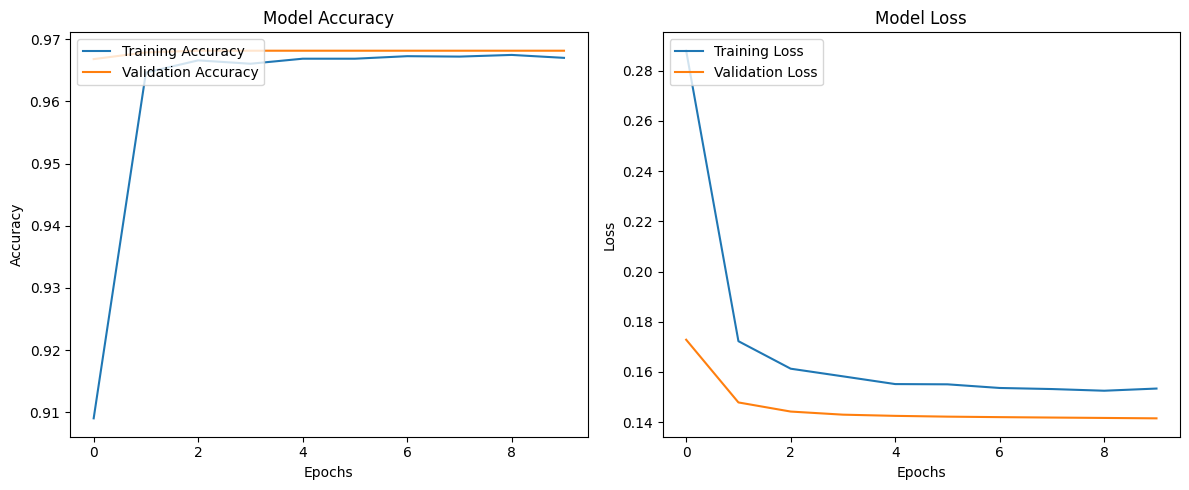

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Make predictions on the test dataset continues as is...

# 10. Visualization of Predictions

In this cell, we visualize the predictions made by the model on the test dataset. The scatter plot provides insights into how well the model has classified the different personality types based on the first two features of the scaled test dataset.

### Steps:

1. **Predict Probabilities**:
   - The model generates probabilities for the test dataset using the `predict` method. The resulting predictions indicate the likelihood of each instance belonging to the "Extrovert" class.

2. **Convert Probabilities to Class Labels**:
   - The predicted probabilities are converted to binary class labels (0 or 1) using a threshold of `0.5`. If the probability is greater than `0.5`, it is classified as `1` (Extrovert); otherwise, it is classified as `0` (Introvert).

3. **Prepare Visualization**:
   - The first two features from the scaled test dataset are selected for visualization. To enhance the visual clarity and prevent overlapping points, random noise is added to the feature values.

4. **Create a Scatter Plot**:
   - A scatter plot is created to visualize the predictions. The x-axis represents the first feature, and the y-axis represents the second feature. Points are colored based on their predicted class labels:
     - **Blue** for Introverts (0)
     - **Red** for Extroverts (1)
   - The size and opacity of the markers are adjusted for better visualization.

5. **Add Title and Labels**:
   - A title and axis labels are added to the plot to make the visualization informative.

6. **Custom Legend**:
   - A custom legend is created to distinguish between the two personality classes. The legend includes colored patches that represent Introverts and Extroverts.

7. **Display the Plot**:
   - Finally, the plot is displayed using the `show()` method.

This visualization aids in understanding the distribution of predictions made by the model and offers insights into the feature space concerning personality classification.

193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


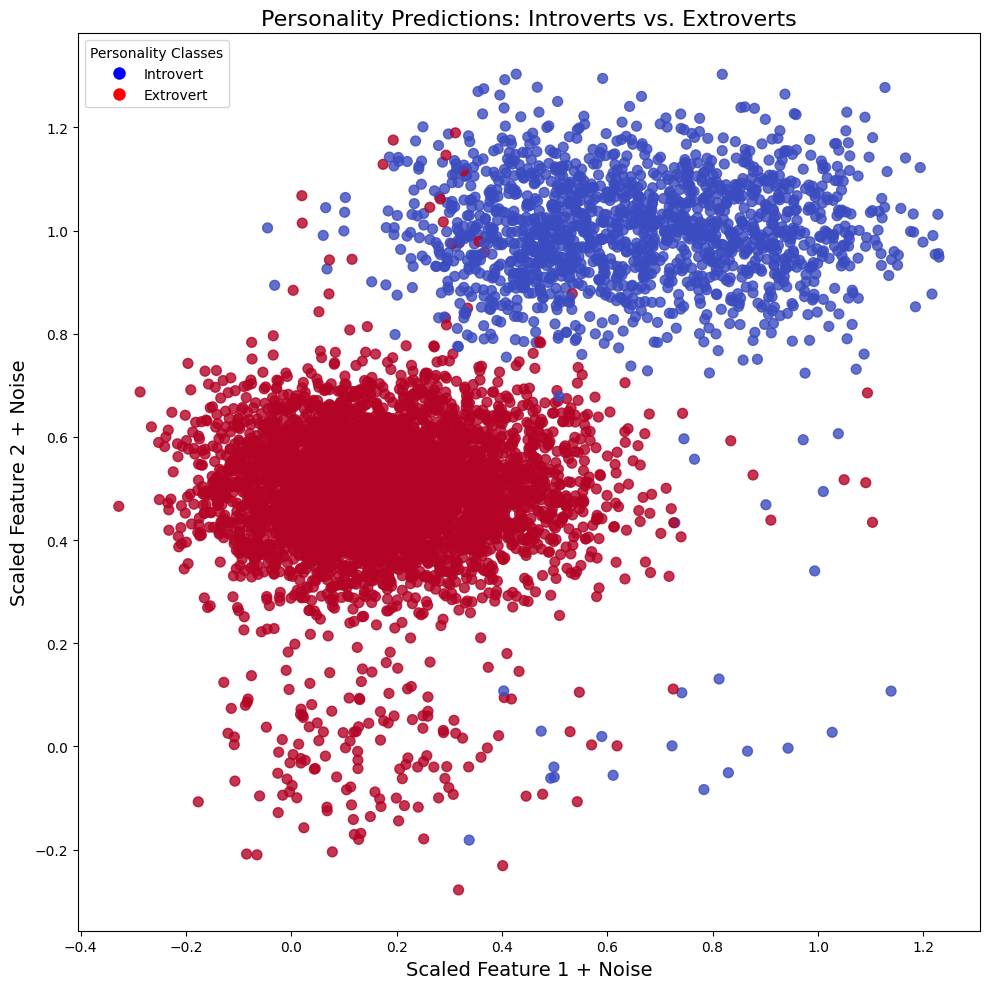

In [9]:
# Cell 9: Visualize Predictions
# Predict the probabilities for the test data
predictions = model.predict(test_dataset)  # This should give you the prediction probabilities
predicted_classes = (predictions > 0.5).astype(int)  # Convert probabilities to binary class labels

# Prepare to visualize the first two features from the scaled test dataset
# Adding noise to the features to disperse the points
noise_scale = 0.1  # Adjust this for better spacing in the visualization

plt.figure(figsize=(10, 10))
plt.scatter(X_test_scaled[:, 0] + np.random.normal(0, noise_scale, size=len(X_test_scaled)), 
            X_test_scaled[:, 1] + np.random.normal(0, noise_scale, size=len(X_test_scaled)),
            c=predicted_classes.flatten(),  # Color based on predictions
            cmap='coolwarm', alpha=0.8, s=50, marker='o')

# Title and labels
plt.title("Personality Predictions: Introverts vs. Extroverts", fontsize=16)
plt.xlabel("Scaled Feature 1 + Noise", fontsize=14)  # Adjust the feature label as needed
plt.ylabel("Scaled Feature 2 + Noise", fontsize=14)  # Adjust the feature label as needed

# Custom legend for Introverts and Extroverts
introvert_patch = plt.Line2D([0], [0], marker='o', color='w', label='Introvert',
                              markerfacecolor='blue', markersize=10)  
extrovert_patch = plt.Line2D([0], [0], marker='o', color='w', label='Extrovert',
                              markerfacecolor='red', markersize=10)  

# Adding the custom legend
plt.legend(handles=[introvert_patch, extrovert_patch], title="Personality Classes")
plt.tight_layout()
plt.show()

# 11. Prediction Conversion and Saving Results

In this cell, we convert the model's predictions from probabilities into binary class labels and save these results to a CSV file for further analysis or submission.

### Steps:

1. **Convert Probabilities to Class Labels**:
   - The model's predictions, which are in probabilities, are converted to binary class labels (0 or 1).
   - A threshold of `0.5` is used: if the predicted probability is greater than `0.5`, the class is labeled as `1` (Extrovert); otherwise, it is labeled as `0` (Introvert).

2. **Display Sample Predictions**:
   - The first five predicted classes are printed to provide a quick overview of the model's outputs and verify the conversion.

3. **Prepare Output for Submission**:
   - A DataFrame is created containing the IDs from the test dataset and the corresponding predicted personality classes. 
   - The predicted labels are mapped back to their original values ("Introvert" and "Extrovert") for better interpretability.

4. **Save the Predictions**:
   - The DataFrame is saved to a CSV file named `submission.csv`. The `index` parameter is set to `False` to prevent the index from being included in the output file.

This process ensures that the predictions made by the model are effectively documented and can be easily shared or evaluated further.

In [10]:
# Convert probabilities to class labels
predicted_classes = (predictions > 0.5).astype(int).flatten()  # Convert probabilities to binary class labels

# Display the first few predicted classes
print("Sample Predictions from Test Data (first 5):", predicted_classes[:5])

# Optional: Save Predictions to a CSV File
output_df = pd.DataFrame({'id': test['id'], 'Personality': predicted_classes})
output_df['Personality'] = output_df['Personality'].map({0: 'Introvert', 1: 'Extrovert'})  # Map back to original labels

# Save to CSV file
output_df.to_csv('submission.csv', index=False)  # Save the predictions for submission or review

Sample Predictions from Test Data (first 5): [1 0 1 1 0]
